In [1]:
# MA3832 A1
# ZHANGJIAYU 13851049


In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# Read dataset
data = pd.read_csv('marketing.csv',sep = ',')
data.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [4]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
# Split test and train set
train_set, test_set = train_test_split(data,test_size = 0.3)
print(train_set.shape,test_set.shape)

(140, 4) (60, 4)


In [13]:
# Split X,Y
Xtrain_set = train_set.iloc[:,[0,1,2]]
Xtrain_set = (Xtrain_set - Xtrain_set.min()) / (Xtrain_set.max() - Xtrain_set.min())
Xtrain_set['constant']=1

Ytrain_set = train_set.iloc[:,[3]]
print(Xtrain_set.head())
print(Ytrain_set.head())

      youtube  facebook  newspaper  constant
91   0.083818  0.030242   0.287599         1
2    0.044817  0.925403   0.606860         1
18   0.222716  0.413306   0.158311         1
71   0.361615  0.288306   0.276165         1
164  0.386931  0.296371   0.044855         1
     sales
91    8.76
2    11.16
18   13.56
71   14.88
164  14.28


In [14]:
Xtest_set = test_set.iloc[:,[0,1,2]]
Xtest_set = (Xtest_set - Xtest_set.min()) / (Xtest_set.max() - Xtest_set.min())
Xtest_set['constant']=1
Ytest_set = test_set.iloc[:,[3]]
print(Xtest_set.head())
print(Ytest_set.head())

      youtube  facebook  newspaper  constant
120  0.480027  0.538776   0.573643         1
117  0.258450  0.008163   0.167959         1
42   1.000000  0.557143   0.000000         1
37   0.252646  1.000000   0.567183         1
69   0.737794  0.887755   0.328165         1
     sales
120  18.60
117  11.28
42   24.84
37   17.64
69   26.76


In [15]:
# transform dataframe into array
X1 = np.array(Xtrain_set)

print(X1[0:5])
Y1 = np.array(Ytrain_set)
print(Y1[0:5])


[[0.083818   0.03024194 0.28759894 1.        ]
 [0.04481697 0.92540323 0.60686016 1.        ]
 [0.22271639 0.41330645 0.15831135 1.        ]
 [0.36161478 0.28830645 0.27616535 1.        ]
 [0.38693124 0.29637097 0.04485488 1.        ]]
[[ 8.76]
 [11.16]
 [13.56]
 [14.88]
 [14.28]]


In [16]:
# Calculate optimal beta
beta= (np.linalg.inv(X1.transpose().dot(X1))).dot(X1.transpose()).dot(Y1)
beta

array([[15.4453813 ],
       [11.61981962],
       [-1.44370448],
       [ 4.12916012]])

In [17]:
# Calculate S2
s2 = (1/(len(Xtrain_set)+4))*np.sum(np.power((Y1-X1.dot(beta)),2))
s2

3.5948966285346877

In [18]:
# Calculate standard deviation

#std= math.sqrt(
std=np.sqrt(s2*(np.linalg.inv(X1.transpose().dot(X1))))
std  

C:\Users\ZHANGJ~1\AppData\Local\Temp/ipykernel_16588/3769323905.py:4: RuntimeWarning: invalid value encountered in sqrt
  std=np.sqrt(s2*(np.linalg.inv(X1.transpose().dot(X1))))


array([[0.5591853 ,        nan, 0.12710501,        nan],
       [       nan, 0.57635428,        nan,        nan],
       [0.12710501,        nan, 0.91114355,        nan],
       [       nan,        nan,        nan, 0.42505163]])

In [19]:
# Q3

In [24]:
B=np.array([1,1,1,1])

In [25]:
def f(x,b):
    return np.dot(x,b)

def grad(x,y,b):
    n=len(Xtrain_set)
    grd=np.dot(x.T,(f(x,b)-y))
    return grd/n

def loss(x,y,b):
    l = np.dot((f(x,b)-y).T,f(x,b)-y)/2
    return l.mean()

In [26]:
X_=X1
Y_=Y1.reshape(-1,1)
b_=B.reshape(-1,1)
learn_rate=0.05
tolerance=1e-6
lossNow=loss(X_,Y_,b_) 
for i in range(20000):
    b_=b_-learn_rate*grad(X_,Y_,b_)
    lossNew=loss(X_,Y_,b_)
    if i%50==0:
        print("the %d times: loss: %f"%(i,lossNew))
        print(b_)
    if abs(lossNow-lossNew)<tolerance:
        break
    lossNow=lossNew

the 0 times: loss: 14263.190131
[[1.41700501]
 [1.36170558]
 [1.18922965]
 [1.71843551]]
the 50 times: loss: 816.175411
[[7.3426082 ]
 [6.1078922 ]
 [3.12011445]
 [9.50835813]]
the 100 times: loss: 676.015970
[[8.58449412]
 [6.76207702]
 [2.80298306]
 [8.88256203]]
the 150 times: loss: 574.321114
[[9.5753059 ]
 [7.2839727 ]
 [2.47781541]
 [8.20760294]]
the 200 times: loss: 497.988108
[[10.42084772]
 [ 7.75072831]
 [ 2.18153302]
 [ 7.62272316]]
the 250 times: loss: 440.591650
[[11.14389465]
 [ 8.16833256]
 [ 1.91135893]
 [ 7.11829517]]
the 300 times: loss: 397.355964
[[11.76252609]
 [ 8.54131869]
 [ 1.66432319]
 [ 6.68356084]]
the 350 times: loss: 364.725066
[[12.29206165]
 [ 8.87397077]
 [ 1.43788945]
 [ 6.30913355]]
the 400 times: loss: 340.047454
[[12.74551538]
 [ 9.170303  ]
 [ 1.22988847]
 [ 5.98686516]]
the 450 times: loss: 321.343407
[[13.13395465]
 [ 9.4340369 ]
 [ 1.03845392]
 [ 5.70968687]]
the 500 times: loss: 307.132902
[[13.46680073]
 [ 9.66859311]
 [ 0.86197034]
 [ 5.47146

In [23]:
# comparison
beta

array([[15.4453813 ],
       [11.61981962],
       [-1.44370448],
       [ 4.12916012]])

In [29]:

Xtest_set.head()

,youtube,facebook,newspaper,constant
120,0.480027,0.538776,0.573643,1
117,0.258450,0.008163,0.167959,1
42,1.000000,0.557143,0.000000,1
37,0.252646,1.000000,0.567183,1
69,0.737794,0.887755,0.328165,1


In [30]:
# Predict

X2=np.array(Xtest_set)

print(X2[0:5])

[[0.48002731 0.53877551 0.57364341 1.        ]
 [0.25844998 0.00816327 0.16795866 1.        ]
 [1.         0.55714286 0.         1.        ]
 [0.25264595 1.         0.56718346 1.        ]
 [0.73779447 0.8877551  0.32816537 1.        ]]


In [31]:
Ytest_set.head()

,sales
120,18.60
117,11.28
42,24.84
37,17.64
69,26.76


In [32]:
y_predict=X2.dot(beta)
print(y_predict[:5])

[[16.97566769]
 [ 7.97339166]
 [26.04844093]
 [18.83234754]
 [25.36645735]]


In [33]:
# Build predicted value into dataframe
y_predict=pd.DataFrame(y_predict)
y_predict.columns=['predict']
y_predict[:5]

,predict
0,16.975668
1,7.973392
2,26.048441
3,18.832348
4,25.366457


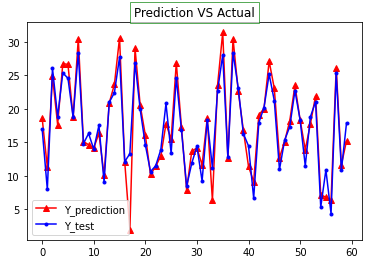

In [34]:
# Plot prediction and actual y
x=range(60)
y1=Ytest_set
y2=y_predict
plt.title('Prediction VS Actual',bbox=dict(facecolor='white',edgecolor='g',alpha=0.65))
plt.plot(x, y1, color = 'red',marker="^", label = "Y_prediction")
plt.plot(x, y2, color = 'blue',marker=".", label = "Y_test")
plt.legend()